In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
sc.settings.n_jobs = 30
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [2]:
adata = sc.read_h5ad("Data/Output_240306_adata_scvi_random_sampleID.h5ad")

In [ ]:
sc.pl.umap(adata, color = ["Dataset"], save = "_Dataset.pdf")

In [3]:
adata.obs["Stage"].value_counts()

Adult (40-60Y)           74482
Fetal (1st trimester)    68108
Adult (60-80Y)           55500
Adult (20-40Y)           45656
Neonatal                 37254
Fetal (2nd trimester)    35183
Childhood (1-6Y)         30726
Adolescence (12-20Y)     14010
Childhood (6-12Y)        13739
Adult (>80Y)             11967
Fetal (3rd trimester)     6435
Name: Stage, dtype: int64

In [4]:
adata_sub = adata[adata.obs["Stage"] == "Fetal (1st trimester)"]

In [20]:
adata_sub.obs[["Age", "Dataset"]].value_counts()

Age         Dataset
62.300001   Braun      17648
70.000000   Braun       7942
98.000000   Braun       6236
60.899999   Braun       6204
56.000000   Braun       5888
84.000000   Braun       5750
49.000000   Braun       3602
78.399999   Braun       3523
105.000000  Braun       3325
112.000000  Braun       3267
60.199999   Braun       3101
73.500000   Braun       1005
63.000000   Braun        617
dtype: int64

In [9]:
adata_sub2 = adata[adata.obs["Stage"] == "Fetal (2nd trimester)"]

In [16]:
adata_sub2.obs["Dataset"].value_counts()

Herring    18150
Cameron    17033
Name: Dataset, dtype: int64

In [17]:
adata_sub2.obs[["Age", "Dataset"]].value_counts()

Age    Dataset
101.5  Cameron    17033
154.0  Herring     9123
168.0  Herring     9027
dtype: int64

In [11]:
adata_sub3 = adata[adata.obs["Stage"] == "Fetal (3rd trimester)"]

In [19]:
adata_sub3.obs[["Age", "Dataset"]].value_counts()

Age    Dataset
238.0  Herring    6435
dtype: int64

In [21]:
adata_sub4 = adata[adata.obs["Stage"] == "Neonatal"]
adata_sub4.obs[["Age", "Dataset"]].value_counts()

Age    Dataset
544.0  Herring    10000
367.0  Herring     9272
451.0  Herring     8042
399.0  Herring     6336
483.0  Herring     3604
dtype: int64

In [22]:
# Define a function to apply the transformation
def age_transformation(row):
    if row["Dataset"] == "Cameron":
        return ((row["Age"] / 7) + 2) * 7
    else:
        return row["Age"]

# Apply the function to modify the "Age" column
adata.obs["Age"] = adata.obs.apply(age_transformation, axis=1)

In [23]:
adata_sub = adata[adata.obs["Dataset"] == "Cameron"]
adata_sub.obs["Age"].value_counts()

115.5    17033
Name: Age, dtype: int64

In [24]:
# Set the value of 'Stage2' to 'First trimester' if 'Age' is between 7 and 30
adata.obs.loc[(adata.obs['Age'] <= 7 * (14+2)), 'Stage'] = 'Fetal (1st trimester)'
adata.obs.loc[(adata.obs['Age'] > 7 * (14+2)) & (adata.obs['Age'] <= 7 * (24+2)), 'Stage'] = 'Fetal (2nd trimester)'
adata.obs.loc[(adata.obs['Age'] > 7 * (24+2)) & (adata.obs['Age'] <= 280), 'Stage'] = 'Fetal (3rd trimester)'
adata.obs.loc[(adata.obs['Age'] > 280) & (adata.obs['Age'] <= 545), 'Stage'] = 'Neonatal'
adata.obs.loc[(adata.obs['Age'] > 545) & (adata.obs['Age'] <= 2555), 'Stage'] = 'Childhood (1-6Y)'
adata.obs.loc[(adata.obs['Age'] > 2555) & (adata.obs['Age'] <= 4745), 'Stage'] = 'Childhood (6-12Y)'
adata.obs.loc[(adata.obs['Age'] > 4745) & (adata.obs['Age'] <= 7665), 'Stage'] = 'Adolescence (12-20Y)'
adata.obs.loc[(adata.obs['Age'] >= 7665) & (adata.obs['Age'] <= 14965), 'Stage'] = 'Adult (20-40Y)'
adata.obs.loc[(adata.obs['Age'] > 14965) & (adata.obs['Age'] <= 22265), 'Stage'] = 'Adult (40-60Y)'
adata.obs.loc[(adata.obs['Age'] > 22265) & (adata.obs['Age'] <= 29565), 'Stage'] = 'Adult (60-80Y)'
adata.obs.loc[(adata.obs['Age'] > 29565), 'Stage'] = 'Adult (>80Y)'

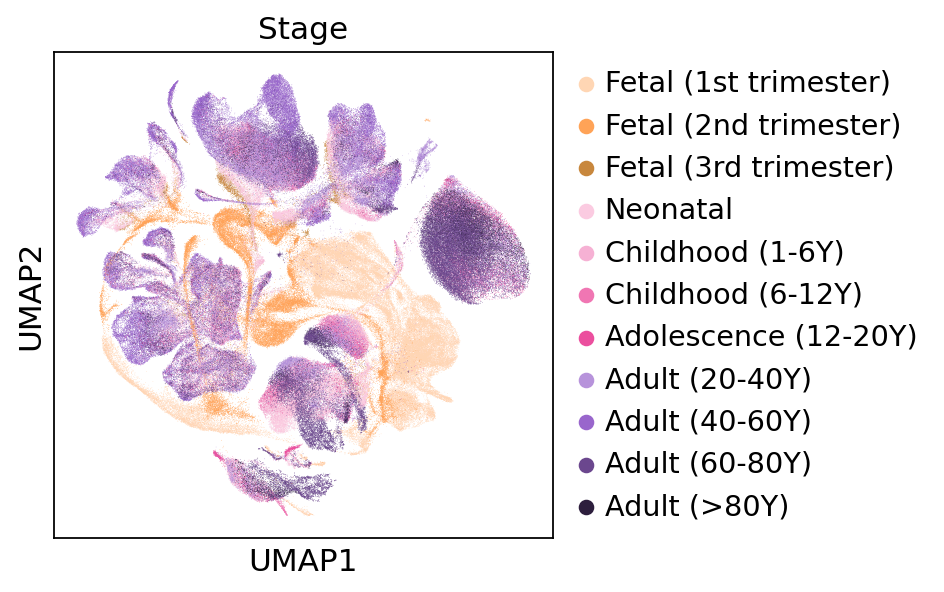

In [25]:
sc.pl.umap(adata, color = "Stage")

In [27]:
adata_sub.obs["Leiden"].value_counts()

C20    3920
C23    2646
C11    2519
C29    2182
C26    1658
C18    1089
C17    1066
C37     875
C3      718
C12      58
C4       50
C9       49
C6       41
C30      32
C2       32
C8       19
C38      16
C40      13
C13      13
C39      11
C14       8
C19       7
C33       4
C16       2
C7        2
C1        2
C31       1
Name: Leiden, dtype: int64

In [28]:
# Assuming 'adata' is your AnnData object

# Modify "Brain_Region" to "BA9" if originally "prefrontal cortex"
adata.obs.loc[adata.obs["Brain Region"] == "prefrontal cortex", "Brain Region"] = "BA9"

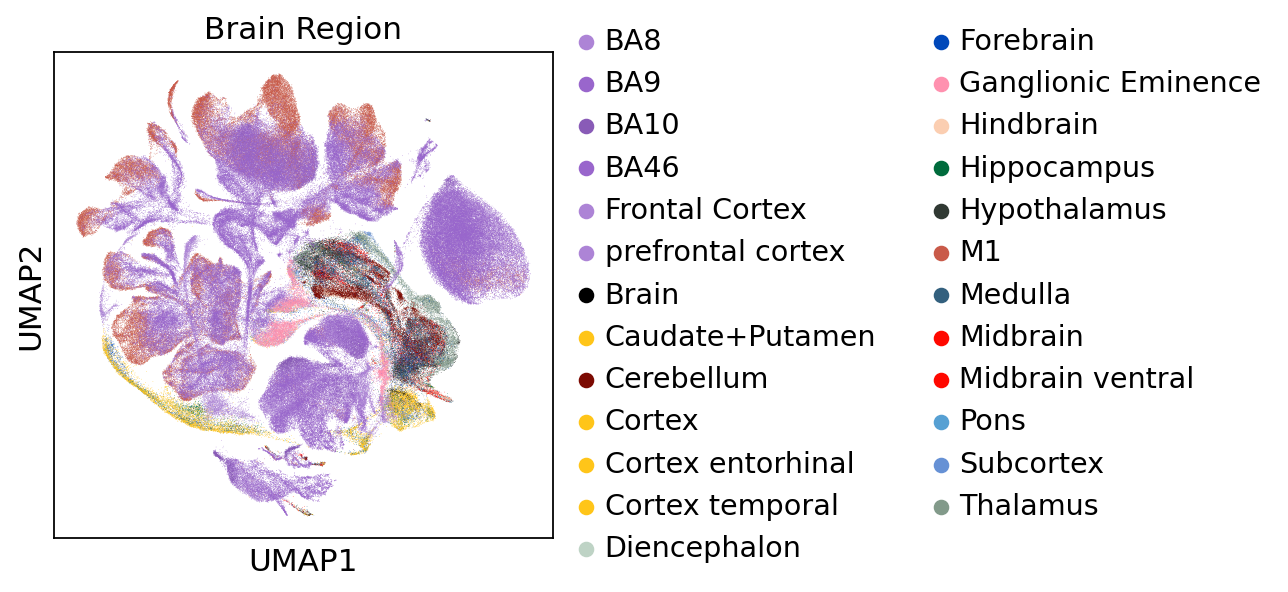

In [29]:
sc.pl.umap(adata, color = "Brain Region")

In [31]:
adata

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_0.6', 'cluster_annotated', 'Leiden', 'Cell Type', 'Stage2'
    uns: 'Brain Region_colors', 'Brain_Region_colors', 'Cell Type_colors', 'Stage_colors', 'cluster_annotated_colors', 'leiden_0.6_colors', 'log1p', 'ttest_pts', 'wilcoxon'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'logcounts', 'scaled'

In [32]:
adata.uns["Brain Region_colors"]

array(['#ad84d6ff', '#9966ccff', '#895bb7ff', '#9966ccff', '#ad84d6ff',
       '#ad84d6ff', '#000000ff', '#ffc519ff', '#7c0a02ff', '#ffc519ff',
       '#ffc519ff', '#ffc519ff', '#bed3c5ff', '#0048baff', '#ff91afff',
       '#fbceb1ff', '#006b3cff', '#303933ff', '#c95a49ff', '#33607eff',
       '#ff0800ff', '#ff0800ff', '#56a0d3ff', '#6691d5ff', '#829a8aff'],
      dtype=object)

In [37]:
adata = adata[adata.obs["Brain Region"] != "prefrontal cortex"]
adata.obs["Brain Region"].value_counts()

BA9                    176459
M1                      74482
BA8                     37888
BA10                    11211
Cerebellum              10288
Thalamus                 9509
Frontal Cortex           9396
Cortex                   8026
BA46                     7879
Ganglionic Eminence      7637
Midbrain                 6399
Brain                    5888
Medulla                  5161
Forebrain                4889
Subcortex                3090
Pons                     2382
Hypothalamus             2303
Cortex temporal          2228
Diencephalon             2114
Hindbrain                1969
Hippocampus              1596
Cortex entorhinal         956
Caudate+Putamen           898
Midbrain ventral          412
Name: Brain Region, dtype: int64

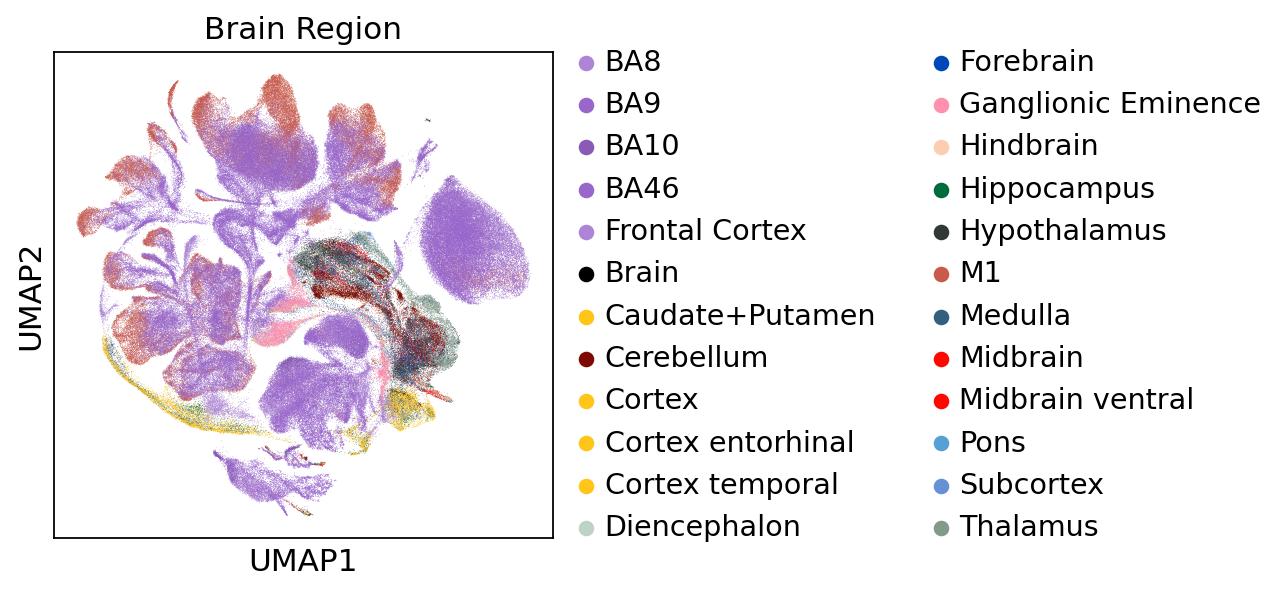

In [38]:
sc.pl.umap(adata, color = "Brain Region")

In [39]:
adata.write_h5ad("Data/Output_240304_adata_scvi_random_sampleID.h5ad")